# Linear Regression

In [36]:
#### links
# https://medium.com/analytics-vidhya/linear-regression-using-pandas-numpy-for-beginners-in-data-science-fe57157ed93d
# https://medium.com/berk-hakbilen/regression-in-machine-learning-90a5271a5a12
# https://builtin.com/data-science/train-test-split
# https://realpython.com/train-test-split-python-data/
# https://www.youtube.com/watch?v=nk2CQITm_eo
# https://www.youtube.com/watch?v=R15LjD8aCzc
# https://www.youtube.com/watch?v=i_LwzRVP7bg

In [37]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from typing import Tuple, List

## Reading the data

In [38]:
# data source: https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction

path = './data/Real estate.csv'
full_data = pd.read_csv(path, index_col='No')
full_data.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [39]:
# we drop the column 'X1 transaction date'
full_data.drop(labels='X1 transaction date', axis=1, inplace=True)	#inplace=True - modifies the original object

#### solution for the requirement at the bottom of the file..
#full_data.drop(labels=['X5 latitude', 'X6 longitude'], axis=1, inplace=True)

## Selecting subsets of training and testing

The initial dataset is divided in two: 70% is the training of the model - the establishment of weight $\theta$, and the remaining is for testing, in order to see how generalized the model is.

As the initial order of the data may disadvantage the model (in the data above, the first records are the oldest sales; the most recent ones are the last in the file), we decide to shuffle the data beforehand and then divide it

In [40]:
from tabulate import tabulate

# randomly shuffle the data
full_data = full_data.sample(frac=1)
# get the percentage of train data ==> test data = 1 - train data
percent_train: float = 0.7
length_of_train: int = int(len(full_data) * percent_train)

# split the data into train and test
train: np.array = np.array(full_data[:length_of_train])
test: np.array = np.array(full_data[length_of_train:])

assert isinstance(train, np.ndarray), 'Train set should be an array'
assert isinstance(test, np.ndarray), 'Test set should be an array'
assert len(train) + len(test) == len(full_data)
assert train.shape[1] == test.shape[1] == len(full_data.columns), 'The number of columns should be the same'


print(len(full_data), "=", len(train), "+", len(test), "(length of full_data = length of train + length of test)\n")

print("--> full_data[4]:\n", tabulate([full_data.iloc[4]], headers='keys', tablefmt='plain-text', showindex=False))
print("--> train[4]:\n", train[4], '\n\n')

print("--> full_data[{}]=".format(length_of_train+3))
print(tabulate([full_data.iloc[length_of_train+3]], headers='keys', tablefmt='plain-text', showindex=False))
print("--> test[3]:\n", test[3])

####links
#https://www.statology.org/pandas-train-test/
#https://stackoverflow.com/questions/24147278/how-do-i-create-test-and-train-samples-from-one-dataframe-with-pandas

414 = 289 + 125 (length of full_data = length of train + length of test)

--> full_data[4]:
   X2 house age    X3 distance to the nearest MRT station    X4 number of convenience stores    Y house price of unit area
--------------  ----------------------------------------  ---------------------------------  ----------------------------
          16.2                                   289.325                                  5                          51.4
--> train[4]:
 [ 16.2    289.3248   5.      51.4   ] 


--> full_data[292]=
  X2 house age    X3 distance to the nearest MRT station    X4 number of convenience stores    Y house price of unit area
--------------  ----------------------------------------  ---------------------------------  ----------------------------
          32.6                                   493.657                                  7                          40.6
--> test[3]:
 [ 32.6   493.657   7.     40.6  ]


In [41]:
# split the train/test data into x_train/x_test and their 'y' validation (x columns are input, y columns are output)
# in our case the x columns are those with info from which we deduce the price (y column)
x_train, y_train = train[:, :-1], train[:, -1]
x_test, y_test = test[:, :-1], test[:, -1]
# y columns have a shape of (n,) so we need to reshape them to (n, 1) to be able to use them in the model
y_train = np.transpose([y_train])
y_test = np.transpose([y_test])

assert x_train.shape[0] == train.shape[0]
assert x_test.shape[0] == test.shape[0]
assert y_train.shape == (x_train.shape[0], 1), f'The vector y_train is a column vector'
assert y_test.shape == (x_test.shape[0], 1), f'The vector y_test is a column vector'


print("-> train:\n", train[1])
print("-> x_train + y_train:\n", x_train[1], y_train[1])
print("-> x_train.shape + y_train.shape: ", x_train.shape, y_train.shape)
print()
print("-> test:\n", test[1])
print("-> x_test + y_test:\n", x_test[1], y_test[1])
print("-> x_test.shape + y_test.shape: ", x_test.shape, y_test.shape)

-> train:
 [  12.8   1449.722    3.      21.4  ]
-> x_train + y_train:
 [  12.8   1449.722    3.   ] [21.4]
-> x_train.shape + y_train.shape:  (289, 3) (289, 1)

-> test:
 [  0.     185.4296   0.      52.2   ]
-> x_test + y_test:
 [  0.     185.4296   0.    ] [52.2]
-> x_test.shape + y_test.shape:  (125, 3) (125, 1)


The functions below are used for the convenient transformation of the data:

For the scaling of the values from the training set between 0 and 1 it is needed to know the min and max of every attribute. For a matrix of form:
$$
\mathbf{X} = 
\begin{pmatrix}
x_0^{(1)} & x_1^{(1)} & x_2^{(1)} & \dots & x_n^{(1)}
\\
x_0^{(2)} & x_1^{(2)} & x_2^{(2)} & \dots & x_n^{(2)}
\\
\vdots & \vdots & \vdots	& \vdots & \vdots
\\
x_0^{(m)} & x_1^{(m)} & x_2^{(m)} & \dots & x_n^{(m)}
\end{pmatrix}
$$
the next are receieved: the minimum and maximum of every column $min_i$, $max_i$, from every value the min of its column is extracted and the value is divided by the difference between the max and the min of the same column. it is important to notice the fact that a column may be constant(min and max are both 1 in column 0 in the design matrix).

## Preprocessing functions

In [42]:
def get_min_max_cols(mat: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    """For a given matrix, calculate and return the maximums and minimums of each column.
    param mat: matrix with at least two rows
    return: minimums and maximums of columns."""
    # mins, maxes = [min(i) for i in mat.T], [max(i) for i in mat.T]
    mins, maxes = mat.min(axis=0, keepdims=True), mat.max(axis=0, keepdims=True) 
    # it is recommended to return the minimums and maximums as a matrix with one line.
    assert mins.shape == maxes.shape == (1, mat.shape[1])
    return mins, maxes

The design matrix has the value 1 on the first column to allow a free term. the rest of the columns are the read data.

In [43]:
def get_design_matrix(mat: np.ndarray) -> np.ndarray:
    """The function creates a design matrix from a given matrix. The design matrix has the same number of 
    rows as the given one, but with a column of ones added(at the beginning)"""
    result: np.ndarray=np.insert(mat, 0, 1, axis=1)
    assert result.shape == (mat.shape[0], mat.shape[1]+1)
    assert np.all(result[:, 0] == 1)
    return result

Implementing the scaling of data in the interval $[0, 1]$:

In [44]:
def scale_values(mat: np.ndarray, min_cols: np.ndarray, max_cols: np.ndarray) -> np.ndarray:
    """Being given the minimums and maximums of each column, scale the values of the given matrix between 0 and 1
    the formula is: (x - min) / (max - min). The minimums and maximums are calculated for each column separately."""
    
    assert isinstance(mat, np.ndarray) and mat.ndim == 2, 'mat must be a matrix'
    assert mat.shape[0] > 1, 'at least two columns are required'
    assert mat.shape[1] == min_cols.shape[-1] == max_cols.shape[-1]
    
    # the case where a column is constant is treated, i.e. the minimum and maximum on it coincide.
    # these columns will not make the division, as it would result in a division by 0
    
    result=mat;
    for i_column in range(result.shape[1]):
        if result[:, i_column].min() == result[:, i_column].max():
            continue
        result[:, i_column]=(result[:, i_column]-min_cols[0, i_column])/(max_cols[0, i_column]-min_cols[0, i_column])
        
    assert result.shape == mat.shape, 'Forma matricei se pastreaza'
    return result

In [45]:
# code testing

_mat: np.ndarray = np.random.randn(1000, 1000) * 50
min_mat, max_mat = get_min_max_cols(_mat)
_mat_scaled: np.ndarray = scale_values(_mat, min_mat, max_mat)

epsilon: float = 1e-5  # a very small natural number; the calculations in floating point might get to a point where the result is not exactly 0 or 1

assert np.min(_mat_scaled) >= -epsilon, f'The matrix is not scaled in [0, 1]: its minimum is {np.min(_mat_scaled)}'
assert np.max(_mat_scaled) <= 1 + epsilon, f'The matrix is not scaled in [0, 1]: its maximum is {np.max(_mat_scaled)}'

_mat = get_design_matrix(_mat)  # add a column of ones
min_mat, max_mat = get_min_max_cols(_mat)
_mat_scaled = scale_values(_mat, min_mat, max_mat)

print(_mat_scaled)
print(np.min(_mat_scaled), np.max(_mat_scaled))

assert np.min(_mat_scaled) >= -epsilon, f'The matrix is not scaled in [0, 1]: its minimum is {np.min(_mat_scaled)}'
assert np.max(_mat_scaled) <= 1 + epsilon, f'The matrix is not scaled in [0, 1]: its maximum is {np.max(_mat_scaled)}'


[[1.         0.49472408 0.40354396 ... 0.5606634  0.35420846 0.49045843]
 [1.         0.65589442 0.32264589 ... 0.3823273  0.47426617 0.53743069]
 [1.         0.44647899 0.41881804 ... 0.76557297 0.61166915 0.3304184 ]
 ...
 [1.         0.59970702 0.35372032 ... 0.7699766  0.27978038 0.32298074]
 [1.         0.45040115 0.53590906 ... 0.45212561 0.30076408 0.32985678]
 [1.         0.17936428 0.33656852 ... 0.6167638  0.28262481 0.56457438]]
0.0 1.0


The training set is preprocessed: design matrix -> scaling:

In [46]:
# getting the design matrix
x_train: np.ndarray = get_design_matrix(x_train)

# we calculate the minimums and maximums on column, from the training set
# these will be used for transforming the data from the test set
x_train_min, x_train_max = get_min_max_cols(x_train)

# we scale the data in the interval [0, 1], using scale_values
x_train_scaled: np.ndarray = scale_values(x_train, x_train_min, x_train_max)

epsilon: float = 1e-5  # a very small natural number

assert np.min(x_train_scaled) >= -epsilon, f'The matrix is not scaled in [0, 1]: its minimum is {np.min(_mat_scaled)}'
assert np.max(x_train_scaled) <= 1 + epsilon, f'The matrix is not scaled in [0, 1]: its maximum is {np.max(_mat_scaled)}'

For the test set the same type of preprocessing is done, with the observation that for scaling the values from `x_train_min` and `x_train_max` will be used:

In [47]:
x_test: np.ndarray = get_design_matrix(x_test)

x_test_scaled: np.ndarray = scale_values(x_test, x_train_min, x_train_max)

print(f'The minimum values from every column of the testing set should not be very much different from 0, except the first column')
print(f'all column minimums for the testing set: {np.min(x_test_scaled)}')

print(f'The maximum values from every column of the testing set should not be very much different from 1, except from the first column, which should actually be 1')
print(f'all column maximums for the testing set: {np.max(x_test_scaled)}')

The minimum values from every column of the testing set should not be very much different from 0, except the first column
all column minimums for the testing set: 0.0
The maximum values from every column of the testing set should not be very much different from 1, except from the first column, which should actually be 1
all column maximums for the testing set: 1.0289471038042874


## Linear regression model

The model of the prediction is:
$$
h_\theta(X) = X \cdot \theta
$$
where $X$ is a design matrix and $\theta$ is a weight vector. 

In [48]:
def model_predict(theta: np.ndarray, x: np.ndarray) -> np.ndarray:
    """Makes predictions for the values from the given matrix x, using the given theta.
    :param theta: column matrix of weights
    :param x: design matrix. every line contains the values of the atributes necessary for a registration.
    :return: column matrix of predictions, with the same number of rows as :param x:."""
    # numarul de trasaturi din x este egal cu numarul de coeficienti din theta
    assert x.shape[1] == theta.shape[0]
    # vectorul theta e vector coloana
    assert theta.shape[1] == 1
    result: np.ndarray = np.dot(x, theta)
    assert result.shape == (x.shape[0], 1)
    return result

In [49]:
# verifying

np.random.seed(100)

_x: np.ndarray = np.random.rand(3, 2)
_y: np.ndarray = np.random.rand(3, 1)
_theta: np.ndarray = np.ones((2, 1))

assert np.allclose(model_predict(_theta, _x), np.array([[0.82177433],
       [1.26929372],
       [0.12628798]]))

## Loss function

The loss function measures how different are the predicitons from the known values (ground truth). Here we use as function of error half of the mean squared error (https://en.wikipedia.org/wiki/Mean_squared_error):

In [50]:
from sklearn.metrics import mean_squared_error

def loss(theta: np.ndarray, x: np.ndarray, y: np.ndarray) -> float:
    """Error function used for gradient descent.
    :param theta: column matrix of weights
    :param x: design matrix. every line contains the values of the atributes necessary for a registration.
    :param y: output values, corresponding to every registration from x
    :return: scalar value, representing the error"""
    
    m: int = x.shape[0]
    y_hat: np.ndarray = model_predict(theta, x)
    # result = mean_squared_error(y_hat, y)
    result: np.float64 = 1/(2*m) * np.sum((y_hat - y)**2)   # why is it not 1/m instead?
    return result

# https://datagy.io/mean-squared-error-python/

In [51]:
np.random.seed(100)

_x: np.ndarray = np.random.rand(3, 2)
_y: np.ndarray = np.random.rand(3, 1)
_theta: np.ndarray = np.ones((2, 1))

assert np.allclose(loss(_theta, _x, _y), 0.03659284388808936)

## The gradient descent and training calculation

In [52]:
def gradient(theta: np.ndarray, x: np.ndarray, y: np.ndarray) -> np.ndarray:
    """Calculates the gradient of the loss function, for the given theta, x and y.
    :param theta: column matrix of weights
    :param x: design matrix with the entry values
    :param y: output values
    :return: vector of output values"""
    
    assert theta.shape[0] == x.shape[1]
    m: int = x.shape[0]
    y_hat: np.ndarray = model_predict(theta, x)
    assert y_hat.shape == (m, 1)
    grad: np.ndarray = 1/m * np.dot(x.T, (y_hat - y))
    assert grad.shape == theta.shape
    return grad

# https://pythonocean.com/blogs/linear-regression-using-gradient-descent-python

In [53]:
def train(x: np.ndarray, y: np.ndarray, alpha:float=0.1, max_iters = 10000, verbose=True) -> Tuple[np.ndarray, List[float]]:
    """Trains the linear regression model on the given data x and y. Returns a list of error values and the final theta.
    :param x: design matrix with entry values
    :param y: output values
    :param alpha: learning rate, implicitly value is 0.1
    :param max_iters: the maximum number of allowed iterations. if the treshold is reached, the training stops.
    :param verbose: if True, prints the error after every 1000 iterations: the number of iterations and the error value.
    :return: a tuple containing the final weights(theta) and a list of error values"""
    
    eps: float = 1e-6
    assert x.shape[0] == y.shape[0]
    assert np.all(x[:, 0] == 1), 'First column of x has to be all ones'
    m, n = x.shape
    theta: np.ndarray = np.zeros((n, 1))
    assert theta.shape == (n, 1)
    assert np.all(theta==0)
    
    losses: list = []
    losses.append(loss(theta, x, y))
    iters: int = 0
    while True:
        iters += 1
        theta = theta - alpha * gradient(theta, x, y)
        current_loss = loss(theta, x, y)
        losses.append(current_loss)
        if (np.abs(losses[-1] - losses[-2]) < eps) or (iters > max_iters):
            break
        if np.isnan(current_loss) or np.isinf(current_loss):
            break
        if verbose and iters % 1000 == 0:
            print(f'Iteration {iters}; loss = {current_loss}')
    return theta, losses

In [54]:
theta, losses = train(x_train_scaled, y_train, alpha=0.5)

In [55]:
print(f'losses={losses}')

losses=[801.8304844290658, 139.61358216334764, 75.25077643182077, 67.16751389329511, 64.53227310736035, 62.560894269677824, 60.791116148281326, 59.16739884022606, 57.67345723765708, 56.297682546753606, 55.02980747865457, 53.860511292097485, 52.78130820487334, 51.784469224919114, 50.86295331868331, 50.010345085550874, 49.22079815398072, 48.488983755050846, 47.810043995164044, 47.17954939536218, 46.59346030482, 46.04809183236588, 45.540081972780314, 45.06636263447468, 44.62413330223942, 44.21083709332772, 43.824138987441614, 43.4619060314235, 43.12218933781871, 42.80320771313804, 42.50333276677103, 42.221075365223136, 41.955073308804366, 41.70408011919918, 41.46695483660566, 41.242652734442174, 41.03021686807043, 40.828770381653634, 40.637509504231, 40.45569717241003, 40.28265722281439, 40.117769102634, 39.96046305135163, 39.81021571101319, 39.66654612630624, 39.52901209924951, 39.39720686650997, 39.27075607028079, 39.1493149963039, 39.03256605502598, 38.92021648406286, 38.81199625213096

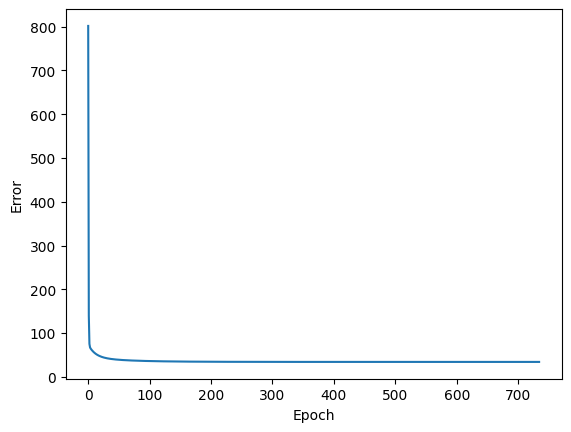

In [56]:
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

## Testing the model

In [57]:
# mean squared error function

def mse(y_true: np.ndarray, y_hat: np.ndarray) -> float:
    """Calculates mean squared error for the vectors y_true and y_hat.
    :param y_true: vector of true values
    :param y_hat: vector of predicted values
    :param return: mean squared error"""
    
    return 1/y_true.shape[0] * np.sum((y_true - y_hat)**2)

### Testing the training set

In [58]:
y_hat_train: np.ndarray = model_predict(theta, x_train_scaled)
    
print(f'Mean squared error for the training set: {mse(y_hat_train, y_train)}')

Mean squared error for the training set: 67.99881319652266


In [59]:
print(f'Actual and predicted values, training set: {list(zip(y_train, y_hat_train))}')

Actual and predicted values, training set: [(array([37.8]), array([37.42869201])), (array([21.4]), array([35.22468038])), (array([37.4]), array([41.28470869])), (array([47.9]), array([47.04523708])), (array([51.4]), array([43.13488025])), (array([26.5]), array([31.72750553])), (array([37.3]), array([39.19853412])), (array([26.5]), array([45.93901193])), (array([29.3]), array([19.87980321])), (array([41.9]), array([43.14528517])), (array([31.3]), array([33.39129789])), (array([43.7]), array([45.50121737])), (array([23.]), array([33.46263216])), (array([29.3]), array([32.64968888])), (array([45.3]), array([39.47012703])), (array([45.9]), array([42.35780405])), (array([24.7]), array([32.18800764])), (array([39.4]), array([43.54202265])), (array([57.8]), array([50.87083918])), (array([48.]), array([42.61571279])), (array([34.4]), array([45.52138851])), (array([29.4]), array([32.86527314])), (array([33.4]), array([33.41146904])), (array([28.5]), array([39.10927968])), (array([40.3]), array(

### Testing the test set

In [60]:
y_hat_test: np.ndarray = model_predict(theta, x_test_scaled)
    
print(f'Mean squared error for the testing set: {mse(y_hat_test, y_test)}')

Mean squared error for the testing set: 125.52195613684295


In [61]:
print(f'actual and predicted values, testing set: {list(zip(y_test, y_hat_test))}')

actual and predicted values, testing set: [(array([21.8]), array([29.71936983])), (array([52.2]), array([40.36772265])), (array([25.5]), array([32.69016152])), (array([40.6]), array([41.40356282])), (array([43.5]), array([34.45690983])), (array([34.]), array([41.6664104])), (array([42.3]), array([32.27482998])), (array([78.3]), array([44.68315193])), (array([56.8]), array([45.63708048])), (array([28.4]), array([33.41146904])), (array([39.3]), array([42.73673967])), (array([70.1]), array([47.6975648])), (array([54.4]), array([49.54211737])), (array([25.3]), array([16.37646038])), (array([35.7]), array([31.28129811])), (array([24.8]), array([30.50504323])), (array([48.2]), array([44.16599857])), (array([50.7]), array([48.00716981])), (array([56.3]), array([51.49075937])), (array([24.7]), array([23.40289857])), (array([48.5]), array([46.0702301])), (array([26.6]), array([33.17876246])), (array([21.8]), array([30.38147868])), (array([25.7]), array([29.80837391])), (array([12.2]), array([3.

Requirements:
1. Find a value for alpha (learning rate) for which the model produces a list of ascending values for the loss function. Make a plot of the loss function 
2. Find a value for alpha > 0 for which the algorithm doesnt stop in 'max_iters' iterations. Make a plot of the loss function.

In [62]:
# Solution for requirement 1
theta, losses = train(x_train_scaled, y_train, alpha = -0.0004, max_iters = 7300, verbose = True)
theta

Iteration 1000; loss = 2283.814684815669
Iteration 2000; loss = 6774.341837488234
Iteration 3000; loss = 20389.78920042424
Iteration 4000; loss = 61681.76785688613
Iteration 5000; loss = 186919.29845889908
Iteration 6000; loss = 566772.389128891
Iteration 7000; loss = 1718901.6348081063


array([[-1541.64930567],
       [ -661.74406415],
       [ -228.97007366],
       [ -688.39297841]])

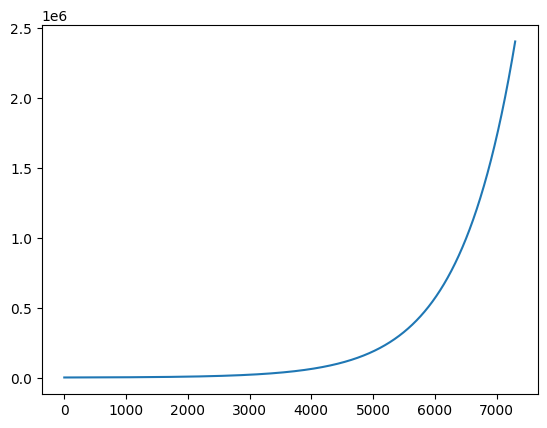

In [63]:
plt.plot(losses)
plt.show()

In [64]:
losses  

[801.8304844290658,
 802.6407020942191,
 803.4518169608831,
 804.2638300249781,
 805.0767422835305,
 805.890554734673,
 806.7052683776469,
 807.5208842128028,
 808.3374032416017,
 809.1548264666167,
 809.9731548915335,
 810.7923895211525,
 811.6125313613894,
 812.4335814192768,
 813.2555407029652,
 814.0784102217244,
 814.9021909859446,
 815.7268840071378,
 816.5524902979389,
 817.3790108721072,
 818.2064467445273,
 819.0347989312104,
 819.8640684492962,
 820.6942563170528,
 821.5253635538794,
 822.357391180307,
 823.190340217999,
 824.0242116897535,
 824.859006619504,
 825.6947260323209,
 826.5313709544122,
 827.3689424131255,
 828.2074414369491,
 829.0468690555128,
 829.8872262995897,
 830.7285142010973,
 831.5707337930982,
 832.4138861098025,
 833.2579721865686,
 834.1029930599036,
 834.948949767466,
 835.7958433480658,
 836.643674841667,
 837.4924452893873,
 838.3421557335005,
 839.1928072174381,
 840.0444007857894,
 840.8969374843033,
 841.7504183598904,
 842.6048444606228,
 843.4

In [65]:
# Solution for requirement 2
theta, losses = train(x_train_scaled, y_train, alpha=0.25, max_iters = 10000, verbose = True)
losses 

Iteration 1000; loss = 34.00215970682591


[801.8304844290658,
 383.1532934940405,
 203.8126112547383,
 126.60677208624527,
 93.0021624376132,
 78.02618586644833,
 71.02393143961825,
 67.4486809323148,
 65.35961509730397,
 63.9276808495877,
 62.79816973544956,
 61.81878222526361,
 60.923613772795804,
 60.0836595075167,
 59.28569685526776,
 58.52327469371556,
 57.79286742103601,
 57.09223253529821,
 56.419708342554586,
 55.77391281251771,
 55.15361364101091,
 54.5576714197113,
 53.985014059324214,
 53.43462460768978,
 52.90553484124123,
 52.39682137558983,
 51.907602904318836,
 51.43703797010564,
 50.984323011583015,
 50.54869057420759,
 50.12940763530933,
 49.72577402000551,
 49.33712089606929,
 48.96280934080072,
 48.60222897515063,
 48.254796661370975,
 47.91995526098116,
 47.59717245013586,
 47.28593958967805,
 46.98577064731491,
 46.69620116948484,
 46.416787300602614,
 46.14710484747994,
 45.88674838682195,
 45.635330413799224,
 45.392480529788074,
 45.15784466746105,
 44.93108435149481,
 44.71187599324278,
 44.49991021779

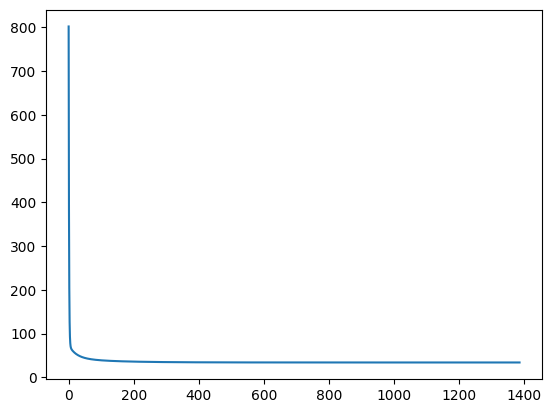

In [66]:
plt.plot(losses)
plt.show()

## The normal equation 

For linear regression the weights $\theta$ can be found by solving the following equation:
$$
{\theta}^{(min)} = \left(\mathbf{X}^t \mathbf{X}\right)^{-1}\mathbf{X}^t\cdot \mathbf{y}
$$
where $\mathbf{X}$ is the design matrix, $\mathbf{y}$ is the vector of ground truth values (known values).
For determining the pseudoinverse of $\left(\mathbf{X}^t \mathbf{X}\right)^{-1}\mathbf{X}^t$ of matrix $\mathbf{X}$ we use the function `np.linalg.pinv` from [NumPy](https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html).

Determine the weights vector using the pseudoinverse and compare the weights vector with the one obtained using gradient descent, for an $\alpha$ which makes the loss function to decrease.

Obs: in the normal equation it is not needed to have the data scaled/normalized, as opposed to the gradient descent algorithm. for comparison purposes however, use the scaled matrix `X_train_scaled`.

In [67]:
theta_normal: np.ndarray = np.linalg.inv(x_train_scaled.T @ x_train_scaled) @ x_train_scaled.T @ y_train
print(f'The weights vector determined by the normal equation method is:\n{theta_normal}')

The weights vector determined by the normal equation method is:
[[ 41.2299834 ]
 [ -8.61536549]
 [-32.38525732]
 [ 13.09997723]]


In [68]:
# we determine a weights vector with the gradient descent method, using the training set
theta_gradient, _ = train(x_train_scaled, y_train, alpha=0.05, max_iters=10000, verbose=False)
print(f'The weights vector determined by the gradient descent method is:\n{theta_gradient}')

The weights vector determined by the gradient descent method is:
[[ 41.13791234]
 [ -8.60805686]
 [-32.15881352]
 [ 13.22314602]]


In [69]:
print(f'The distance between the two determined vectors (by using the two previous methods): {np.linalg.norm(theta_gradient - theta_normal)}')

The distance between the two determined vectors (by using the two previous methods): 0.2738208148111606


## The selection of attributes
In the initial dataset the latitude and logitude are present as columns x5 and x6, being the last two columns in x_train and x_test:

In [70]:
full_data.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
No,,,,
192,13.2,750.0704,2,37.8
206,12.8,1449.7220,3,21.4
379,37.3,587.8877,8,37.4
24,10.1,279.1726,7,47.9
141,16.2,289.3248,5,51.4


We ask outselves if removing the two column improves the performance of the prediction model. Implement and execute the following steps:
1. Delete the last two columns from x_train and x_test;
2. Re-call the preprocessing functions for the new x_train and x_test;
3. Re-train the model using the gradient descent algorithm and calculate the loss function on the training and testing sets. Compare the values obtained with the ones obtained in the initial case;